In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
# working on dataset to find out better platform for advertising to increase sales
# reading dataset
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.info()
# datatypes are float of all column and non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()
# checking skewness

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull().sum()
# no missing values 

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

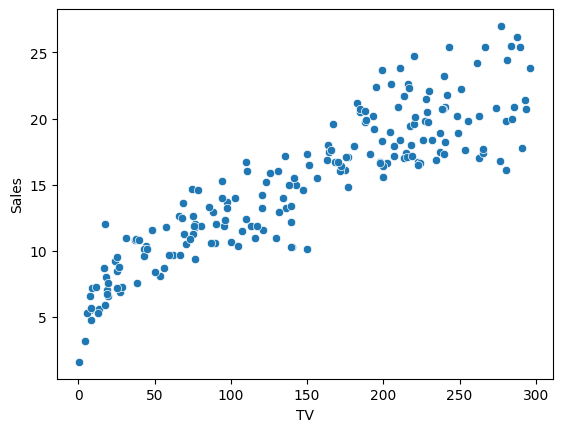

In [7]:
# visualize to check linear relationship
plt.figure()
sns.scatterplot(x='TV',y='Sales',data=df)
plt.show()
# we can observe there is linear relationship between TV(feature) and Sales(Target), but correlation cannot be 1 due to distributed data.

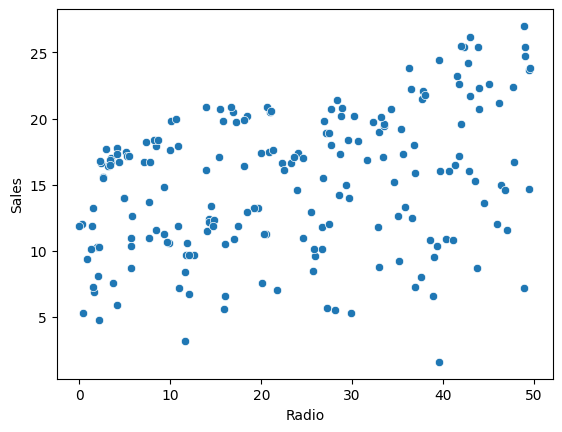

In [8]:
plt.figure()
sns.scatterplot(x='Radio',y='Sales',data=df)
plt.show()
# we can observe there is linear relationship between Radio and Sales, but correlation between data is poor due to distributed data.

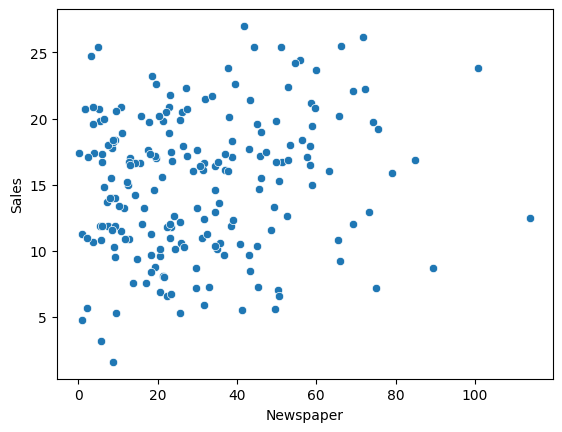

In [9]:
plt.figure()
sns.scatterplot(x='Newspaper',y='Sales',data=df)
plt.show()
# no linear relationship between Newspaper and Sales

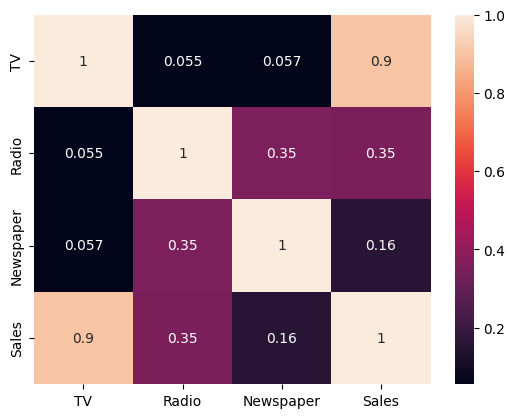

In [10]:
# to check correlation between data
plt.figure()
sns.heatmap(df.corr(),annot=True)
plt.show()

# Linear Regression

Model for TV(Feature) and Sales(Target)

In [11]:
# Selection of feature
X=df['TV']      #Feature
y=df['Sales']   #Target

In [12]:
# splitting dataset
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
# splitting data with 30% test size and random_state Hyperparameter to control the randomness in ML Model

In [13]:
lr=LinearRegression()

In [14]:
# print(y_train.ndim,y_train.shape)
# print(x_train.ndim,x_train.shape)

In [15]:
# training model(fitting data)
lr.fit(np.array(x_train).reshape(-1,1),y_train)
# data reshape required as feature is single and fit requires 2D
# so x_train is reshaped

LinearRegression()

In [16]:
# Slope
lr.coef_

array([0.05566076])

In [17]:
# OLS:intercept
lr.intercept_  #this value will be same

6.904032471762278

In [18]:
# Predict
y_pred=lr.predict(np.array(x_test).reshape(-1,1))
y_pred

array([18.63732145, 18.17533711, 12.23076755, 22.50017844, 21.03073428,
       22.68942504, 15.99343517, 16.96749854, 10.83368238, 18.89336096,
       16.06022809, 10.75575732, 18.85439842, 13.01558432, 19.4722329 ,
       13.90059046, 14.23455504, 23.08461646,  8.32894802, 18.63175537,
       12.49237314, 10.67783225,  8.30111764, 12.88199849, 13.18813269,
       17.39052034,  9.30301138, 20.75243046, 16.18824785, 20.26818182,
       20.25704967, 19.95648154, 15.23644879, 16.37749444, 20.73016616,
       17.19570767, 19.2829863 , 14.10653529, 18.97128603,  7.99498344,
        7.63318848, 11.9357655 ,  7.94488875, 18.26439433,  7.31035605,
       15.10286296, 11.25670419, 19.59468658, 18.31448902, 19.67817773,
       23.0289557 , 13.75587248,  7.98385129, 17.06768791, 21.68753129,
       16.12145493, 19.06590933,  8.29555156, 19.82289571,  9.29744531])

In [19]:
# Model evaluation
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)*100
print('MSE:',mse)
print('RMSE',rmse)
print('MAE:',mae)
print("Accuracy: %.2f" %r2)

MSE: 5.143558863773587
RMSE 2.267941547697733
MAE: 1.86239036505223
Accuracy: 79.85


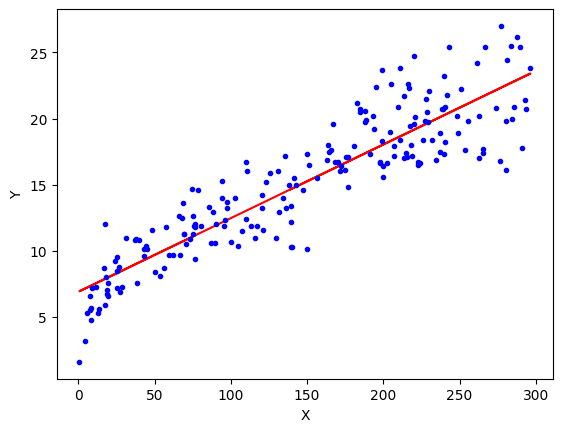

In [20]:
X=np.array(X).reshape(-1,1)
plt.plot(x_train, lr.predict(np.array(x_train).reshape(-1,1)) , color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

----

Model for Radio(Feature) and Sales(Target)

In [21]:
A=df['Radio']    #Feature
b=df['Sales']    #Target
x_train,x_test,y_train,y_test=train_test_split(A,b,test_size=0.3,random_state=1)

In [22]:
lr=LinearRegression()
lr.fit(np.array(x_train).reshape(-1,1),y_train)

LinearRegression()

In [23]:
y_pred=lr.predict(np.array(x_test).reshape(-1,1))
y_pred

array([17.83456599, 14.74545246, 12.38052673, 13.3649695 , 14.63229812,
       16.97459299, 15.79778784, 13.44417754, 14.03258011, 14.89255311,
       14.58703639, 14.54177465, 14.93781484, 17.63088817, 13.14997625,
       16.39750585, 14.30415053, 12.68604345, 16.63512997, 15.56016372,
       13.30839233, 16.36355955, 15.13017722, 13.80627143, 14.19099619,
       14.27020423, 15.24333157, 15.2885933 , 16.97459299, 14.11178815,
       16.91801582, 12.60683541, 16.25040521, 13.10471451, 15.63937176,
       14.59835182, 12.60683541, 12.8670904 , 17.18958624, 14.49651291,
       12.26737239, 12.25605695, 13.59127818, 15.94488848, 15.40174764,
       14.92649941, 17.51773383, 16.48802932, 17.32537145, 15.87699588,
       17.00853929, 16.13725086, 14.03258011, 17.44984122, 14.48519748,
       13.35365406, 12.83314409, 13.46680841, 13.19523799, 15.15280809])

In [24]:
# Model evaluation
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)*100
print('MSE:',mse)
print('RMSE',rmse)
print('MAE:',mae)
print("Accuracy: %.2f" %r2)

MSE: 22.079207158307437
RMSE 4.698851685072368
MAE: 4.129189952623039
Accuracy: 13.49


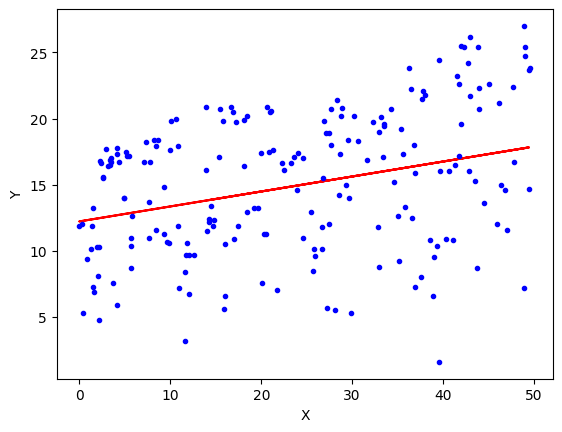

In [25]:
A=np.array(A).reshape(-1,1)
plt.plot(x_train, lr.predict(np.array(x_train).reshape(-1,1)) , color="r")
plt.plot(A, b, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

---

Model for Newspaper(Feature) and Sales(Target)

In [26]:
C=df['Newspaper']   #Feature
d=df['Sales']       #Target
x_train,x_test,y_train,y_test=train_test_split(C,d,test_size=0.3,random_state=1)

In [27]:
lr=LinearRegression()
lr.fit(np.array(x_train).reshape(-1,1),y_train)

LinearRegression()

In [28]:
y_pred=lr.predict(np.array(x_test).reshape(-1,1))
y_pred

array([15.1754091 , 14.91480786, 13.88094719, 14.4790484 , 14.84645344,
       16.39297229, 15.82477614, 16.05974447, 15.3078458 , 16.02556726,
       15.5898078 , 14.34661171, 13.73569404, 15.76069386, 15.97857359,
       16.94835199, 15.04297241, 13.92794086, 13.96211807, 13.96211807,
       13.71860543, 18.43506072, 15.41464959, 14.03047249, 15.21385847,
       14.65847877, 15.06433316, 14.54313068, 13.71860543, 14.54313068,
       14.35515601, 17.18759248, 13.82113707, 15.06860532, 14.43205474,
       14.50468131, 14.12445983, 14.90199141, 14.72683319, 14.29107374,
       14.65847877, 14.55594713, 14.56449143, 15.52999768, 15.33347871,
       14.38078892, 15.03870025, 14.93189647, 14.40214968, 16.73474441,
       15.75214956, 14.09455477, 14.51749777, 16.07256093, 13.57762443,
       14.31670665, 14.7353775 , 14.83363698, 13.93648516, 14.44059904])

In [29]:
# Model evaluation
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)*100
print('MSE:',mse)
print('RMSE',rmse)
print('MAE:',mae)
print("Accuracy: %.2f" %r2)

MSE: 26.05927191114068
RMSE 5.104828293991942
MAE: 4.384239973311935
Accuracy: -2.10


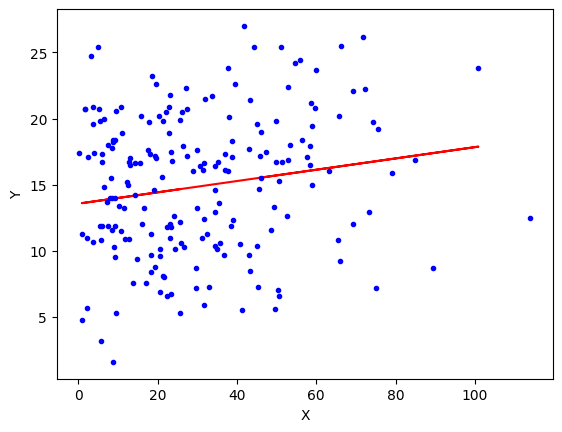

In [30]:
C=np.array(C).reshape(-1,1)
plt.plot(x_train, lr.predict(np.array(x_train).reshape(-1,1)) , color="r")
plt.plot(C, d, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [31]:
# r2----radio=0.13---->poor model
# r2----newspaper=-0.02---->bad model

# Multiple Linear Regression

In [32]:
# further increasing model efficiency by adding more feature
# selection of feature: TV and Radio
E=df[['TV','Radio']]    #Feature
f=df['Sales']           #Target
# splitting dataset
x_train,x_test,y_train,y_test=train_test_split(E,f,test_size=0.3,random_state=1)

In [33]:
# model
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
lr.intercept_

4.639008926907955

In [35]:
lr.coef_

array([0.05500479, 0.10164376])

In [36]:
# predict
y_pred=lr.predict(x_test)
y_pred

array([21.27554871, 18.04413436, 10.04526843, 21.07795257, 20.76423625,
       24.50740473, 16.83323361, 15.68162724, 10.14864711, 18.88583302,
       15.81165115, 10.52903732, 18.88798717, 15.53710632, 17.89256894,
       15.30376549, 13.7533847 , 21.04564029, 10.01123808, 19.22700869,
       11.13726975, 12.08849512,  8.6318737 , 11.9695358 , 12.61765092,
       16.84166307,  9.72360365, 21.0787461 , 18.08284546, 19.54310936,
       22.0528736 , 17.88322056, 16.49174353, 14.79364521, 21.37183984,
       16.9439132 , 17.21766262, 12.33599795, 21.02620801,  7.76014232,
        5.40022916,  9.64193492,  6.89748794, 19.20956586,  7.89673349,
       15.17050006, 13.69731125, 21.01207034, 20.49912402, 20.54570123,
       24.87342707, 14.9269724 ,  7.33240195, 19.3788249 , 21.28115586,
       14.76423945, 17.20643146,  7.13220997, 18.27975661,  9.63678816])

In [37]:
# model evaluation
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)*100
print('MSE:',mse)
print('RMSE',rmse)
print('MAE:',mae)
print("Accuracy: %.2f" %r2)

MSE: 2.364506943376236
RMSE 1.5376953350310443
MAE: 1.191975327783676
Accuracy: 90.74


In [38]:
# efficiency of the model increased from previous model

# Polynomial Regression

Since the data is distributed and doesn't have direct linear relationship,
so the model evluation is not close to reality.
We will use polynomial regression to increase efficiency and overcome problems

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
pf=PolynomialFeatures(2)  #object of polynomial features
# degree of x is 2 for quadratic model

In [41]:
E=df[['TV','Radio']]    #Feature
f=df['Sales']           #Target

In [42]:
x_train,x_test,y_train,y_test=train_test_split(E,f,test_size=0.3,random_state=1)

In [43]:
# converting training and testing features to quadratic one
x_train_poly=pf.fit_transform(x_train)
x_test_poly=pf.transform(x_test)
# fit_transform-->training dataset
# transform-->testing dataset

In [44]:
# sales=TV theta1+radio theta2+TV**2 theta3+radio**2 theta4+theta0

In [45]:
# model building and trainig
lr=LinearRegression()
lr.fit(x_train_poly,y_train)

LinearRegression()

In [46]:
y_pred=lr.predict(x_test_poly)
y_pred

array([23.18306453, 18.02290837, 11.27416586, 18.80860338, 19.7204984 ,
       24.57861205, 17.43409852, 15.8642468 , 10.32012397, 18.72173229,
       16.13732386, 10.50317618, 18.7508934 , 16.58482932, 17.22594704,
       15.97563608, 14.19043105, 18.25536219,  8.73183753, 19.40993222,
       11.83004901, 11.88396684,  7.56550199, 12.48461746, 13.04703178,
       16.91560902,  9.04897141, 20.48297234, 19.28447138, 18.64911677,
       22.82980906, 17.01974243, 17.25476878, 15.18192322, 21.00013673,
       17.10169   , 16.68424752, 13.18647729, 22.28216875,  6.8208962 ,
        6.05278055, 10.96099479,  6.48754869, 19.66440667,  6.24928586,
       15.59073835, 14.04887872, 21.57316158, 21.9418769 , 20.65432499,
       24.84536124, 15.49199453,  6.64540349, 20.9612716 , 19.86173448,
       15.15313651, 16.739875  ,  6.93552657, 17.4544774 ,  8.9819961 ])

In [47]:
# Model evaluation
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)*100
print('MSE:',mse)
print('RMSE',rmse)
print('MAE:',mae)
print("Accuracy: %.2f" %r2)

MSE: 1.4561026730448037
RMSE 1.2066907942985243
MAE: 0.9476471686239127
Accuracy: 94.29


In [48]:
# efficiency increased from previous models along with reduction in errors using polynomial regression